In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
Data = pd.read_csv('Tetuan City power consumption.csv')

In [3]:
Data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [11]:
num_rows, num_columns = Data.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 52416
Number of columns: 9


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [6]:
Data['DateTime'] = pd.to_datetime(Data['DateTime'])

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DateTime                   52416 non-null  datetime64[ns]
 1   Temperature                52416 non-null  float64       
 2   Humidity                   52416 non-null  float64       
 3   Wind Speed                 52416 non-null  float64       
 4   general diffuse flows      52416 non-null  float64       
 5   diffuse flows              52416 non-null  float64       
 6   Zone 1 Power Consumption   52416 non-null  float64       
 7   Zone 2  Power Consumption  52416 non-null  float64       
 8   Zone 3  Power Consumption  52416 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.6 MB


**visualisation**

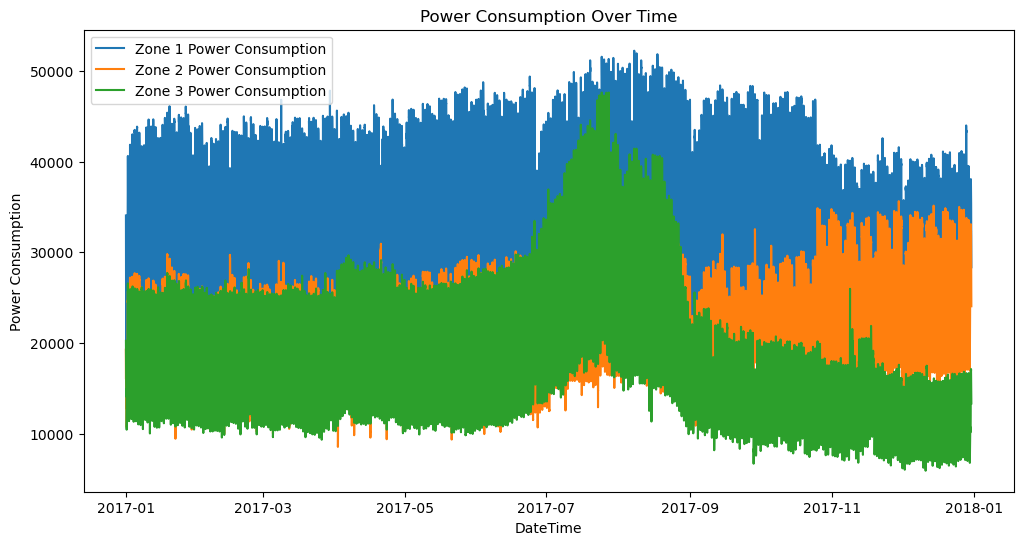

In [15]:
# Visualize over time
plt.figure(figsize=(12, 6))
plt.plot(Data['DateTime'], Data['Zone 1 Power Consumption'], label='Zone 1 Power Consumption')
plt.plot(Data['DateTime'], Data['Zone 2  Power Consumption'], label='Zone 2 Power Consumption')
plt.plot(Data['DateTime'], Data['Zone 3  Power Consumption'], label='Zone 3 Power Consumption')
plt.xlabel('DateTime')
plt.ylabel('Power Consumption')
plt.title('Power Consumption Over Time')
plt.legend()
plt.show()

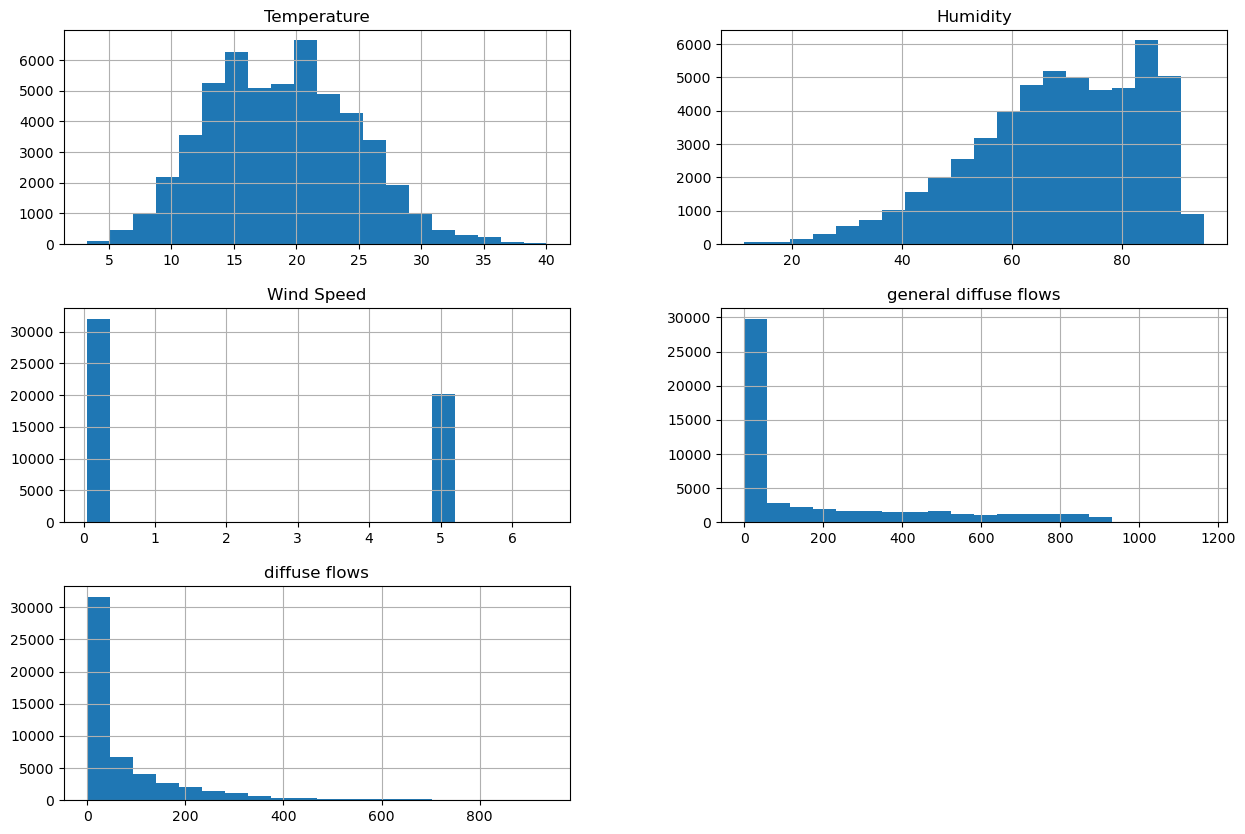

In [16]:
# Histograms for numerical features
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows']
Data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.show()

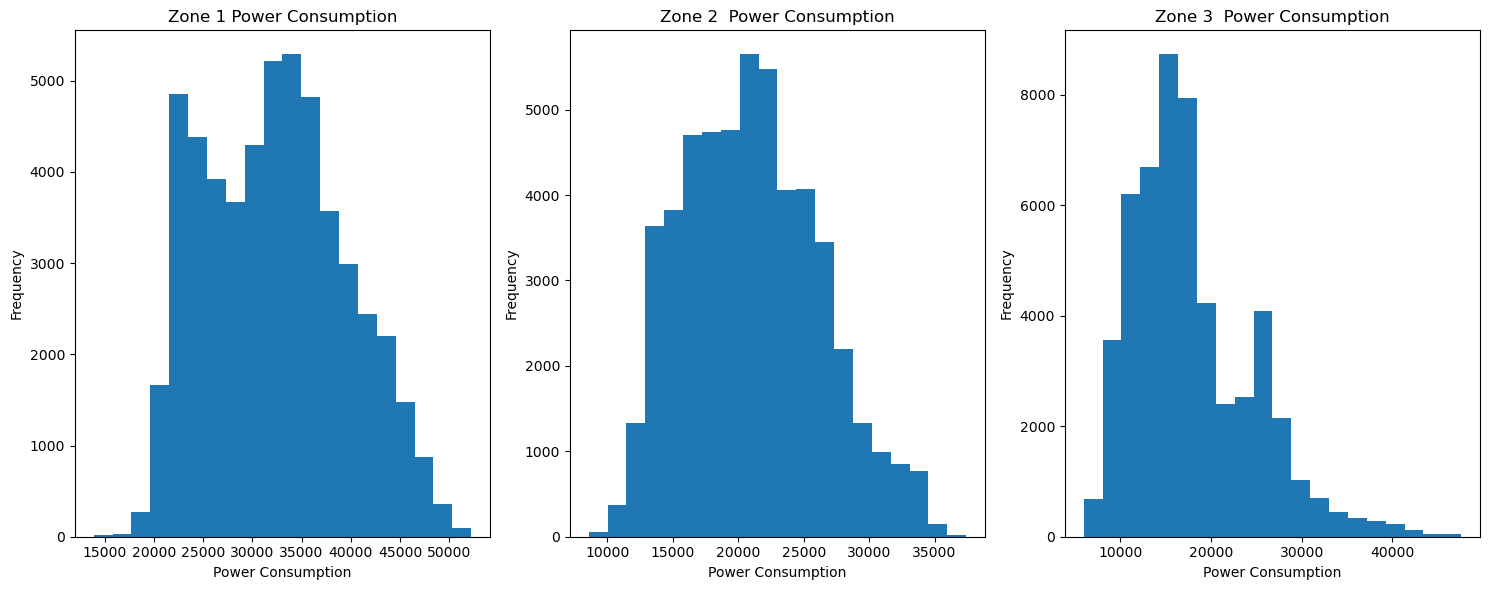

In [20]:
# Boxplot for target variables
plt.figure(figsize=(15, 6))
for i, target in enumerate(target_variables, 1):
    plt.subplot(1, len(target_variables), i)
    plt.hist(Data[target], bins=20)
    plt.title(target)
    plt.xlabel('Power Consumption')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [21]:
print(Data.describe())

                  DateTime   Temperature      Humidity    Wind Speed  \
count                52416  52416.000000  52416.000000  52416.000000   
mean   2017-07-01 23:55:00     18.810024     68.259518      1.959489   
min    2017-01-01 00:00:00      3.247000     11.340000      0.050000   
25%    2017-04-01 23:57:30     14.410000     58.310000      0.078000   
50%    2017-07-01 23:55:00     18.780000     69.860000      0.086000   
75%    2017-09-30 23:52:30     22.890000     81.400000      4.915000   
max    2017-12-30 23:50:00     40.010000     94.800000      6.483000   
std                    NaN      5.815476     15.551177      2.348862   

       general diffuse flows  diffuse flows  Zone 1 Power Consumption  \
count           52416.000000   52416.000000              52416.000000   
mean              182.696614      75.028022              32344.970564   
min                 0.004000       0.011000              13895.696200   
25%                 0.062000       0.122000              26

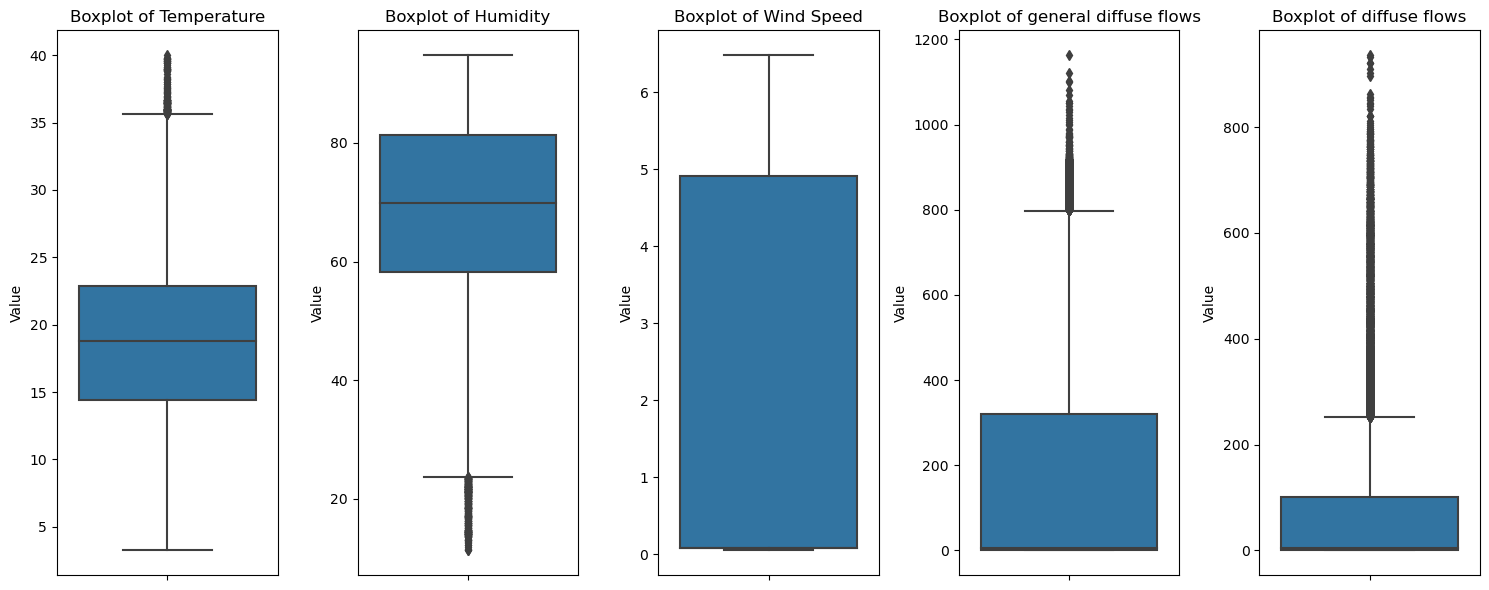

In [24]:
#boxplot of features

plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(y=Data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')
plt.tight_layout()
plt.show()


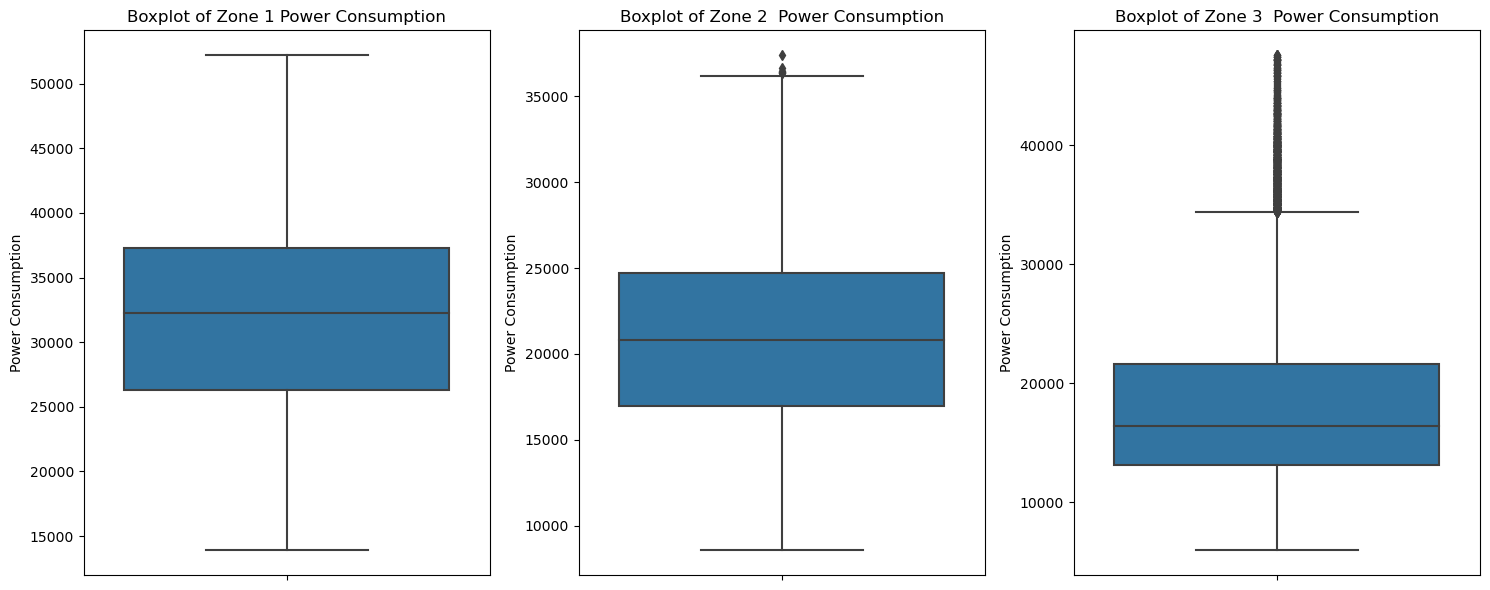

In [23]:
#boxplot of target

plt.figure(figsize=(15, 6))
for i, target in enumerate(target_variables, 1):
    plt.subplot(1, len(target_variables), i)
    sns.boxplot(y=Data[target])
    plt.title(f'Boxplot of {target}')
    plt.ylabel('Power Consumption')
plt.tight_layout()
plt.show()


**correlation analysis**

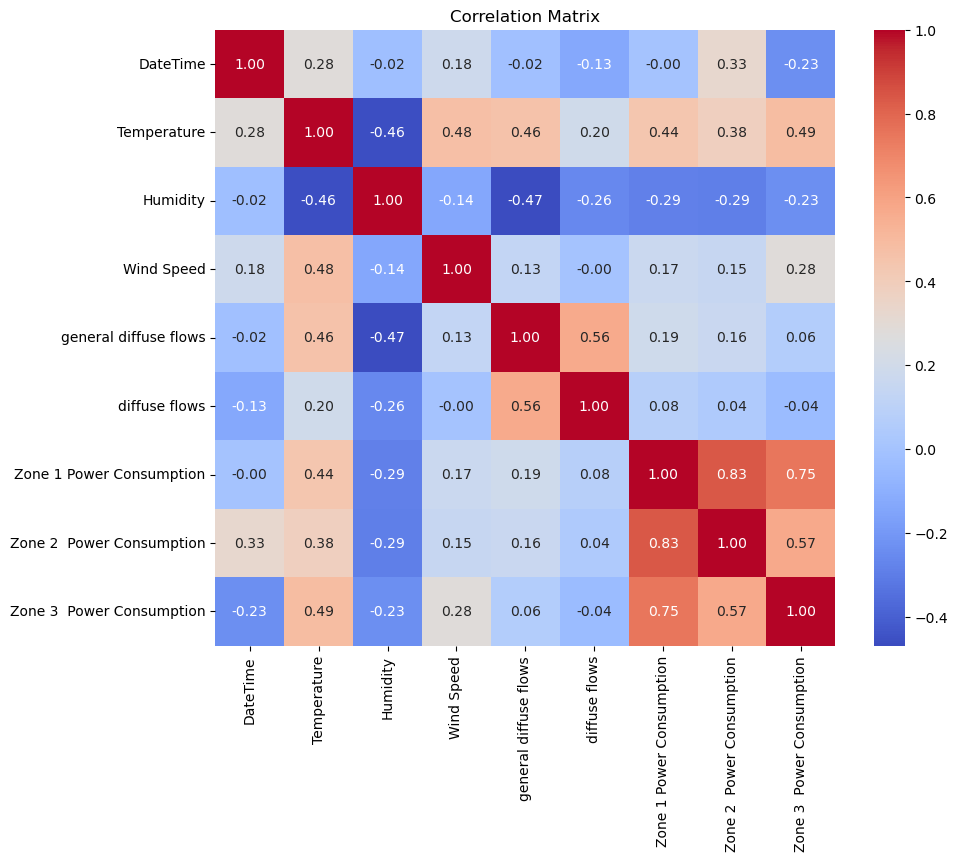

In [25]:
# Compute the correlation matrix
correlation_matrix = Data.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**explanation**

This code will compute the correlation matrix for your dataset and plot it as a heatmap. The heatmap will provide a visual representation of the correlations between numerical features and target variables. Positive correlations are represented in warmer colors (towards red), while negative correlations are represented in cooler colors (towards blue).

Interpreting the correlation matrix:

Look for strong correlations (close to 1 or -1) between variables.
Positive correlations indicate that as one variable increases, the other variable tends to increase as well.
Negative correlations indicate that as one variable increases, the other variable tends to decrease.
A correlation close to 0 indicates no linear relationship between the variables.